In [22]:
import matplotlib.pyplot as plt
from pykalman import KalmanFilter
import nbformat
from scipy import stats
import numpy as np
import pandas as pd
from hmmlearn import hmm
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.metrics import mean_squared_error



df=pd.read_csv("sonnguyen.csv")
data2 = np.loadtxt("sonnguyen.csv",encoding='latin-1', delimiter=',', skiprows=1, usecols=(8, 9, 10), dtype=float)
df.head()

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [23]:
import nbformat

# In ra phiên bản của nbformat
print("Phiên bản nbformat:", nbformat.__version__)


Phiên bản nbformat: 5.10.4


In [24]:
feats= ['Ngày','8','9','10']
df[feats].head()



,Ngày,8,9,10
0,01/01/2021,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.1,1002.1
4,01/05/2021,1061.5,1061.5,1061.5


In [25]:
feats1= ['8','9','10']
df[feats1].head()

,8,9,10
0,964.4,964.4,964.4
1,1019.7,1019.7,1019.7
2,988.4,988.4,988.4
3,1002.0,1002.1,1002.1
4,1061.5,1061.5,1061.5


Shape of observations: (365, 3)
Shape of state_means: (365, 3)


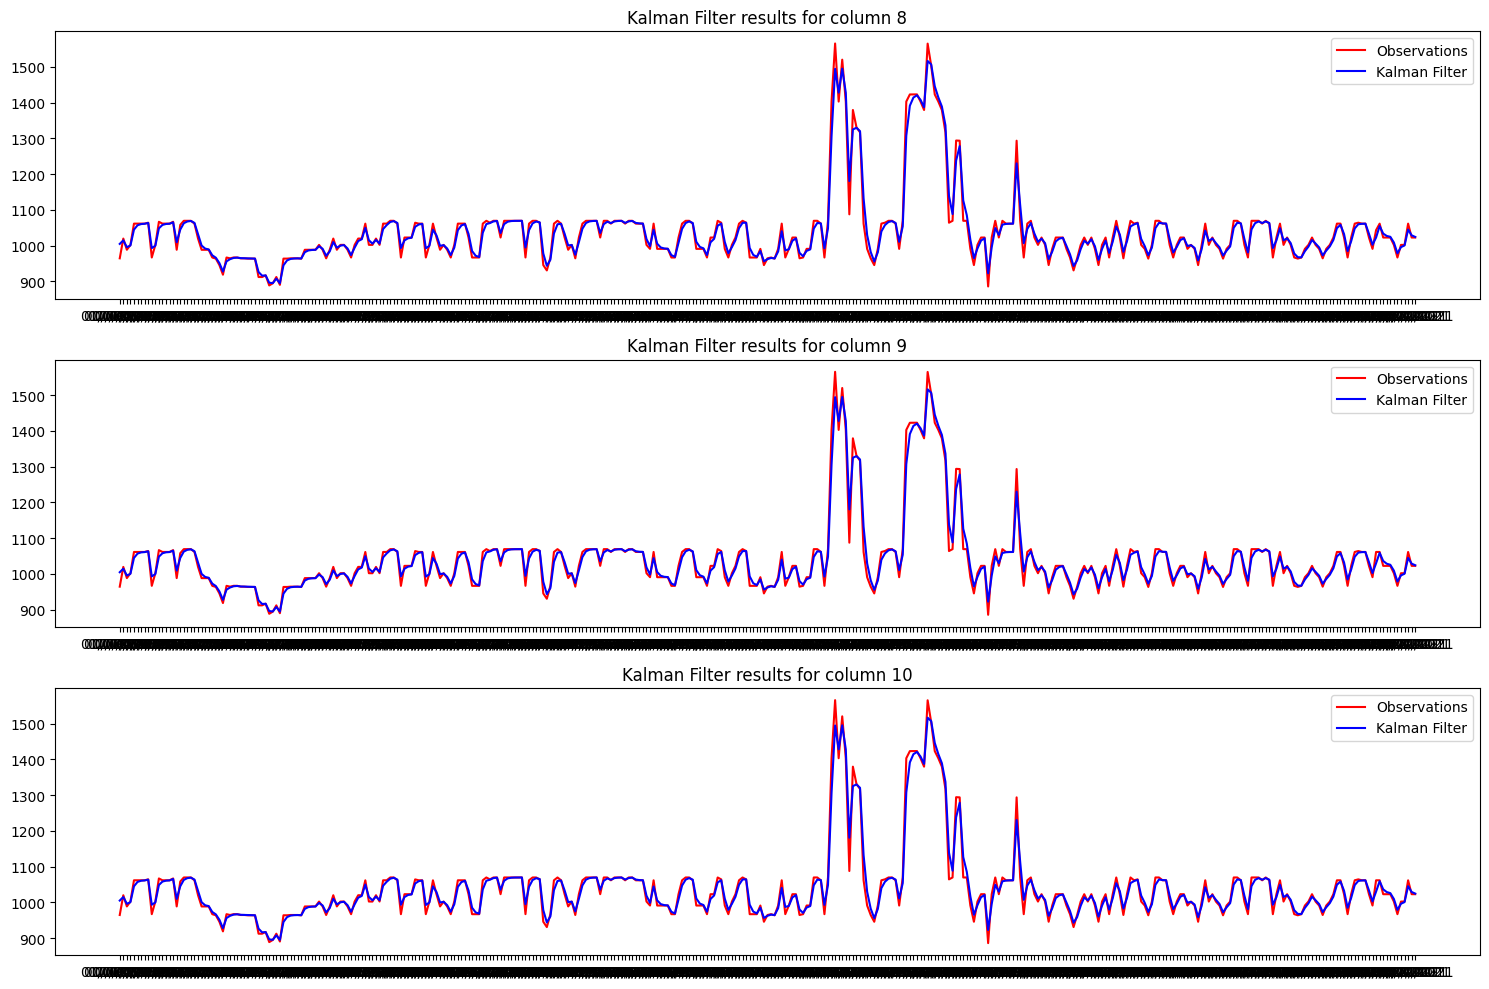

In [26]:


# Check the head of the DataFrame for the specified columns
# print(df[feats1].head())

# Get data for columns 8, 9, 10
observations = df[feats1].values

# Define the Kalman Filter model
kf = KalmanFilter(initial_state_mean=np.mean(observations, axis=0),
                  n_dim_obs=observations.shape[1])

# Estimate the states
state_means, state_covariances = kf.em(observations).filter(observations)

# Debugging information
print("Shape of observations:", observations.shape)
print("Shape of state_means:", state_means.shape)

# Plot the results for each column
plt.figure(figsize=(15, 10))

for i, col in enumerate(feats1):
    plt.subplot(len(feats1), 1, i+1)
    plt.plot(df['Ngày'], observations[:, i], 'r', label='Observations')
    plt.plot(df['Ngày'], state_means[:, i], 'b', label='Kalman Filter')
    plt.title(f'Kalman Filter results for column {col}')
    plt.legend()

plt.tight_layout()
plt.show()


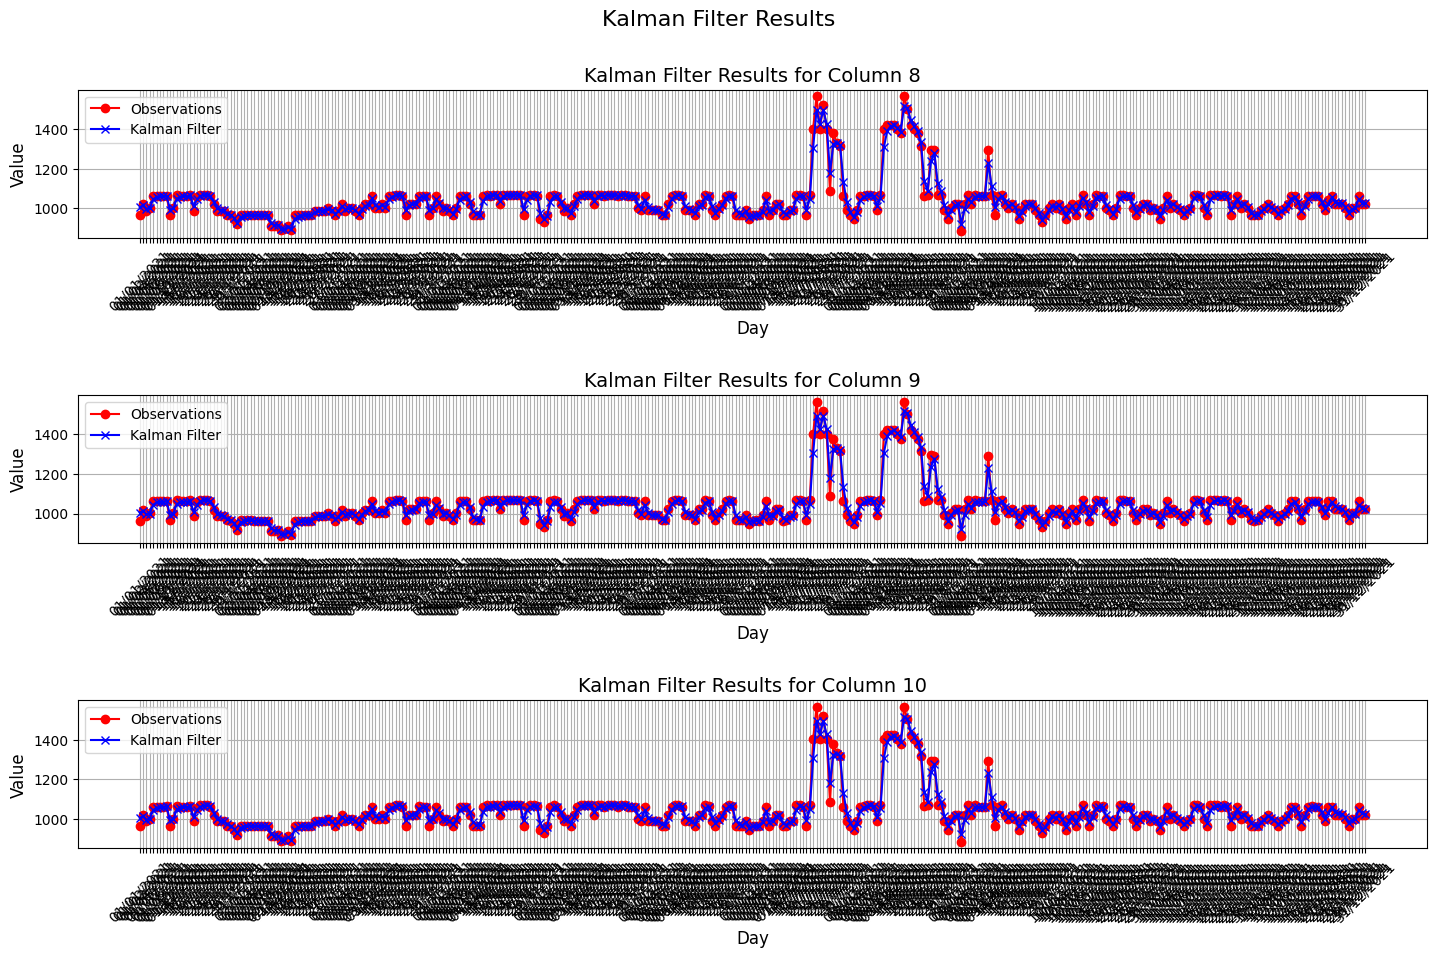

In [27]:
# Plot the results for each column
plt.figure(figsize=(15, 10))

for i, col in enumerate(feats1):
    plt.subplot(len(feats1), 1, i+1)
    plt.plot(df['Ngày'], observations[:, i], 'r', label='Observations', linestyle='-', marker='o')
    plt.plot(df['Ngày'], state_means[:, i], 'b', label='Kalman Filter', linestyle='-', marker='x')
    plt.title(f'Kalman Filter Results for Column {col}', fontsize=14)
    plt.xlabel('Day', fontsize=12)
    plt.ylabel('Value', fontsize=12)
    plt.legend(loc='upper left', fontsize=10)
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)

# Show the plot
plt.suptitle('Kalman Filter Results', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()

In [28]:
import plotly.graph_objects as go

fig = go.Figure()

# Add traces for each column
for i, col in enumerate(feats1):
    fig.add_trace(go.Scatter(x=df['Ngày'], y=observations[:, i],
                             mode='lines+markers',
                             name=f'Observations {col}',
                             line=dict(color='red'),
                             marker=dict(symbol='circle')))

    fig.add_trace(go.Scatter(x=df['Ngày'], y=state_means[:, i],
                             mode='lines+markers',
                             name=f'Kalman Filter {col}',
                             line=dict(color='blue'),
                             marker=dict(symbol='x')))

# Update layout for better visualization
fig.update_layout(
    title='Kalman Filter Results',
    xaxis_title='Ngày',
    yaxis_title='Value',
    legend=dict(x=0, y=1.0),
    hovermode='closest'
)

# Show the plot
fig.show()

In [29]:
from pykalman import KalmanFilter
# Lấy dữ liệu cột 8, 9, 10
observations = df[feats1].values

# Định nghĩa mô hình Kalman Filter
kf = KalmanFilter(initial_state_mean=np.mean(observations, axis=0),
                  n_dim_obs=3)

# Ước lượng trạng thái
state_means, state_covariances = kf.em(observations).filter(observations)

In [30]:
print("Shape of state_means:", state_means.shape)

Shape of state_means: (365, 3)


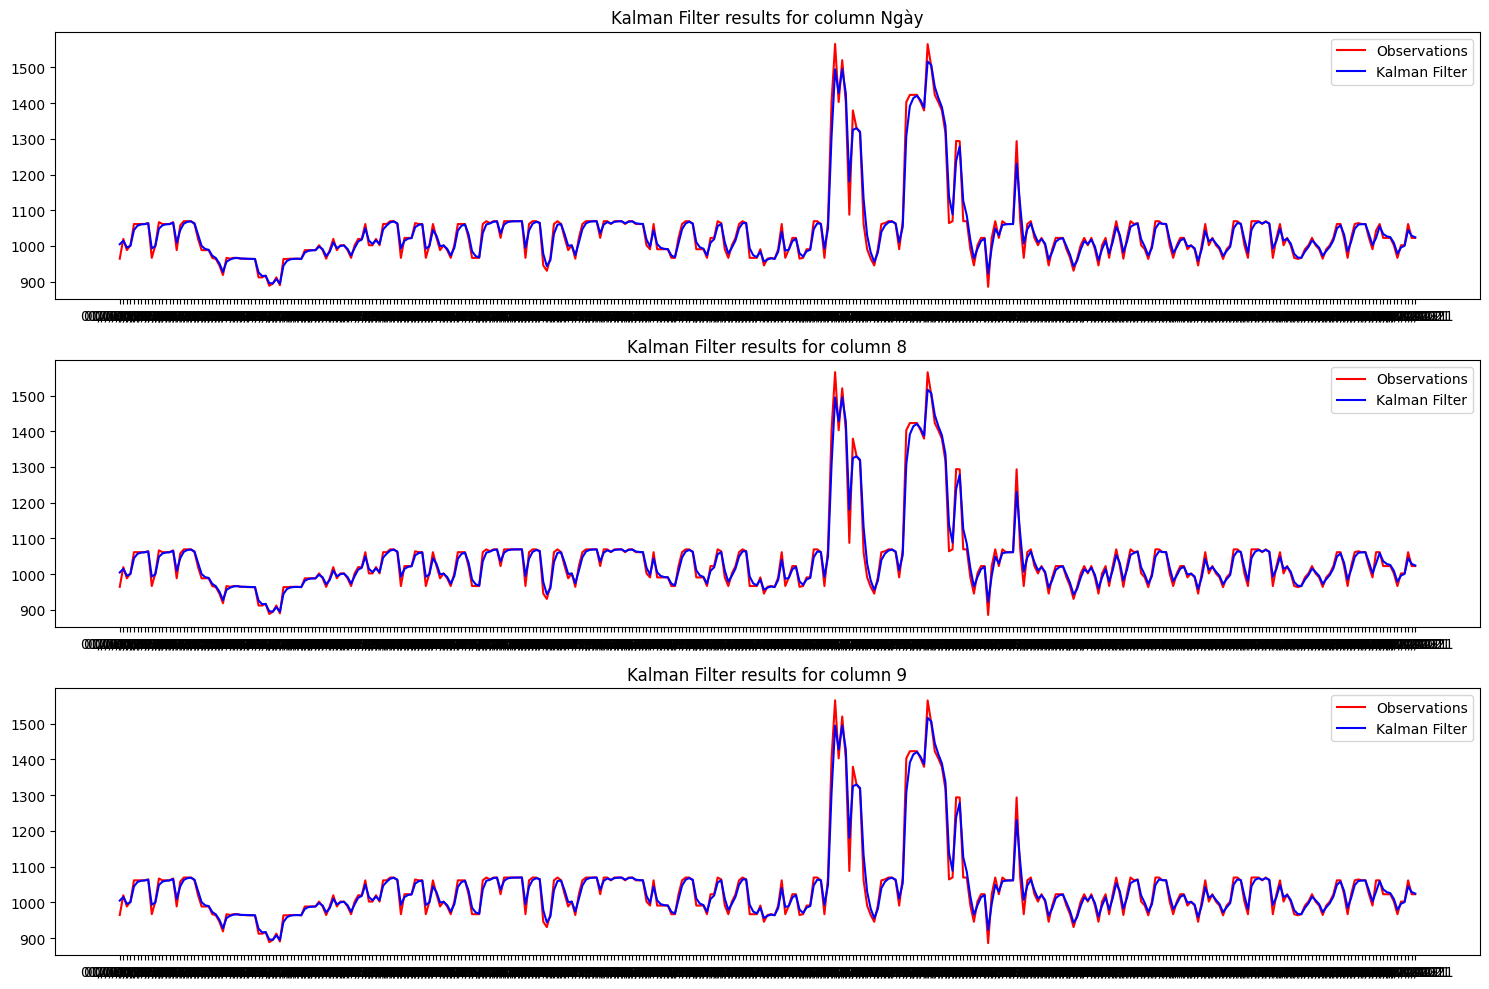

In [42]:
# Trực quan hóa kết quả cho từng cột
plt.figure(figsize=(15, 10))

# Sử dụng min(len(feats), 3) thay cho len(feats) để giới hạn số lượng hàng
for i, col in enumerate(feats[:3]):  # Sử dụng feats[:3] để giới hạn số lượng cột
    plt.subplot(3, 1, i+1)
    plt.plot(df['Ngày'], observations[:, i], 'r', label='Observations')
    plt.plot(df['Ngày'], state_means[:, i], 'b', label='Kalman Filter')
    plt.title(f'Kalman Filter results for column {col}')
    plt.legend()

plt.tight_layout()
plt.show()


In [43]:
# Tính toán các chỉ số đánh giá
for i, col in enumerate(feats):
    mse = mean_squared_error(observations[:, i], state_means[:, i])
    mae = mean_absolute_error(observations[:, i], state_means[:, i])
    rmse = np.sqrt(mse)
    print(f'Column {col} - MSE: {mse:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}')

Column Ngày - MSE: 292.6740, MAE: 10.3026, RMSE: 17.1077
Column 8 - MSE: 294.5877, MAE: 10.3401, RMSE: 17.1636
Column 9 - MSE: 294.5878, MAE: 10.3401, RMSE: 17.1636


IndexError: index 3 is out of bounds for axis 1 with size 3

In [ ]:
# Khởi tạo HMM
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=1000)

# Huấn luyện HMM với dữ liệu quan sát
model.fit(data2)

# In ra các tham số của mô hình sau khi huấn luyện
print("Start probabilities: ", model.startprob_)
print("Transition matrix: ", model.transmat_)
print("Means: ", model.means_)
print("Covariances: ", model.covars_)



Start probabilities:  [4.71397566e-17 1.00000000e+00]
Transition matrix:  [[5.29169049e-20 1.00000000e+00]
 [1.11111184e-02 9.88888882e-01]]
Means:  [[ 993.37499394  997.92499098  997.899991  ]
 [1040.74736883 1040.74736883 1040.74736883]]
Covariances:  [[[ 1070.31886332  1298.41499276  1299.15686712]
  [ 1298.41499276  1588.6235953   1589.47921952]
  [ 1299.15686712  1589.47921952  1590.33671873]]

 [[11111.33825486 11111.33825486 11111.33825486]
  [11111.33825486 11111.33825486 11111.33825486]
  [11111.33825486 11111.33825486 11111.33825486]]]


In [ ]:
# Dự đoán trạng thái ẩn cho các quan sát hiện có
hidden_states = model.predict(data2)
print("Hidden states: ", hidden_states)

# Lấy mẫu mới từ mô hình đã huấn luyện
X, Z = model.sample(5)  # Lấy mẫu 5 quan sát mới
print("Sampled observations: ", X)
print("Sampled hidden states: ", Z)

Hidden states:  [1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
Sampled observations:  [[1292.30111474 1292.30111488 1292.30111488]
 [ 993.51841384  993.51841153  993.51841153]
 [1085.67059579 1085.6705952  1085.6705952 ]
 [1015.63117022 1015.63117164 1015.63117164]
 [ 994.48250922  994.48251048  994.48251

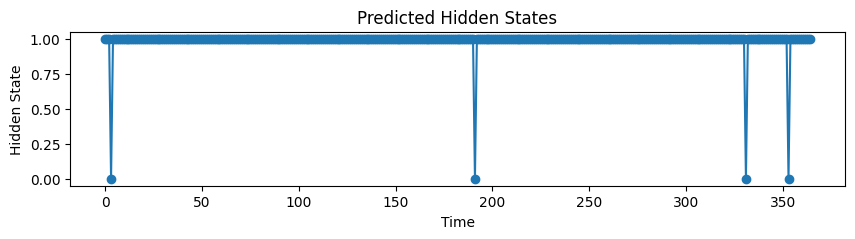

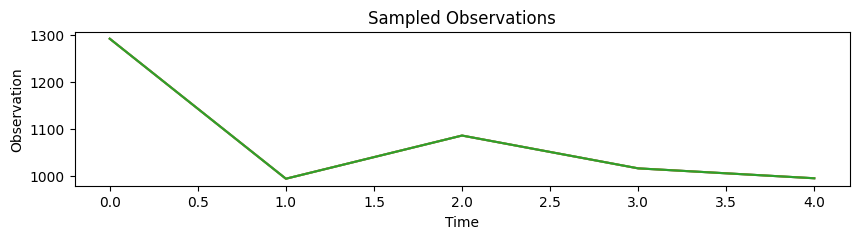

In [ ]:
# Vẽ các trạng thái ẩn dự đoán
def plot_hidden_states(hidden_states, title):
    plt.figure(figsize=(10, 2))
    plt.plot(hidden_states, marker='o')
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Hidden State")
    plt.show()

plot_hidden_states(hidden_states, "Predicted Hidden States")

# Vẽ các quan sát mẫu
def plot_observations(observations, title):
    plt.figure(figsize=(10, 2)) 
    plt.plot(observations)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Observation")
    plt.show()

plot_observations(X, "Sampled Observations")

In [ ]:
df2 = pd.DataFrame(df[feats])
df2.head()

,day,8,9,10
0,1/01/2021,964.4,964.4,964.4
1,1/02/2021,1019.7,1019.7,1019.7
2,1/03/2021,988.4,988.4,988.4
3,1/04/2021,1002.0,1002.1,1002.1
4,1/05/2021,1061.5,1061.5,1061.5


In [ ]:
# Chuẩn hóa ma trận chuyển tiếp
def normalize_transition_matrix(transition_matrix):
    return transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# Định nghĩa hàm markov_chain
def markov_chain(transmat, state, state_names, samples):
    (rows, cols) = transmat.shape 
    rvs = [] 
    values = list(np.arange(0, rows))

    # Tạo các biến ngẫu nhiên cho mỗi hàng của ma trận chuyển tiếp
    for r in range(rows): 
        rv = stats.rv_discrete(name="row" + str(r), values=(values, transmat[r]))
        rvs.append(rv)

    # Bắt đầu từ trạng thái ban đầu và sau đó lấy mẫu biến ngẫu nhiên phù hợp
    # dựa trên trạng thái theo sau các chuyển tiếp
    states = [] 
    for n in range(samples): 
        state = rvs[state].rvs(size=1)[0]    
        states.append(state_names[state])
    return states

def compute_transition_matrix(df2):
    weather_states = []
    for column in df2.columns[1:]:
        for i in range(len(df2[column])-1):
            if df2[column][i] < df2[column][i+1]:
                weather_states.append('S')  # Nắng
            else:
                weather_states.append('C')  # Mây

    transition_counts = {'S': {'S': 0, 'C': 0}, 'C': {'S': 0, 'C': 0}}
    for i in range(len(weather_states)-1):
        from_state = weather_states[i]
        to_state = weather_states[i+1]
        transition_counts[from_state][to_state] += 1

    transition_matrix = np.zeros((2, 2))
    for i, from_state in enumerate(['S', 'C']):
        for j, to_state in enumerate(['S', 'C']):
            transition_matrix[i, j] = transition_counts[from_state][to_state] / weather_states.count(from_state)

    return transition_matrix

# Tính toán ma trận chuyển tiếp từ dữ liệu thời tiết
transmat = compute_transition_matrix(df2)
transmat = normalize_transition_matrix(transmat)  # Chuẩn hóa ma trận chuyển tiếp

# Gọi hàm markov_chain để tạo mẫu dữ liệu thời tiết dựa trên ma trận chuyển tiếp
samples = markov_chain(transmat, 0, ['S', 'C'], 365)

# In ra mẫu dữ liệu thời tiết
print(samples)


['S', 'S', 'S', 'S', 'C', 'S', 'C', 'C', 'C', 'S', 'C', 'S', 'C', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'S', 'C', 'S', 'S', 'C', 'C', 'C', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'C', 'S', 'S', 'C', 'C', 'C', 'C', 'S', 'C', 'C', 'C', 'C', 'S', 'C', 'C', 'S', 'S', 'C', 'C', 'C', 'S', 'S', 'C', 'S', 'C', 'C', 'C', 'C', 'S', 'C', 'S', 'C', 'S', 'S', 'S', 'C', 'S', 'C', 'S', 'C', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'C', 'C', 'C', 'S', 'C', 'C', 'C', 'S', 'C', 'C', 'C', 'C', 'S', 'S', 'C', 'C', 'S', 'S', 'C', 'C', 'C', 'C', 'S', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'C', 'C', 'C', 'C', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'C', 'C', 'S', 'C', 'C', 'C', 'S', 'S', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'C', 'C', 'C', 'C', 'S', 'S', 'C', 'C', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'C', 'C', 'C', 'S',

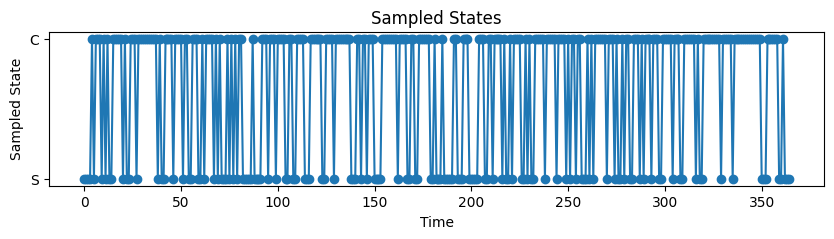

In [ ]:
# Hàm vẽ biểu đồ cho dữ liệu mẫu dự đoán
def plot_samples(samples, title):
    plt.figure(figsize=(10, 2))
    plt.plot(samples, marker='o')   
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Sampled State")
    plt.show()

# Gọi hàm để vẽ biểu đồ
plot_samples(samples, "Sampled States")

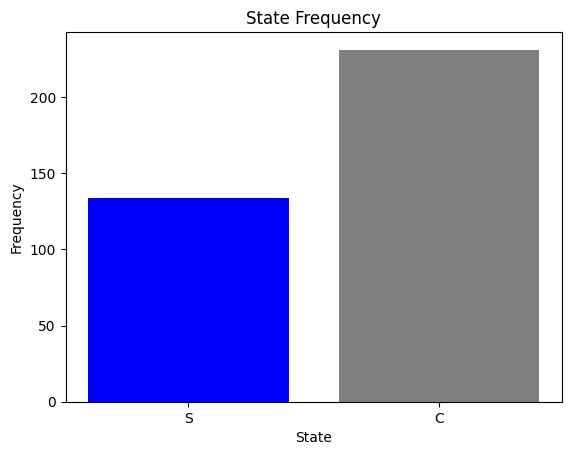

In [ ]:
# Hàm vẽ biểu đồ cho dữ liệu samples
def plot_samples(samples):
    # Đếm số lần xuất hiện của mỗi trạng thái
    counts = {'S': 0, 'C': 0}
    for sample in samples:
        counts[sample] += 1

    # Vẽ biểu đồ cột
    plt.bar(counts.keys(), counts.values(), color=['blue', 'grey'])
    plt.xlabel('State')
    plt.ylabel('Frequency')
    plt.title('State Frequency')
    plt.show()

# Gọi hàm để vẽ biểu đồ
plot_samples(samples)

# MAmba theo trung bình trượt

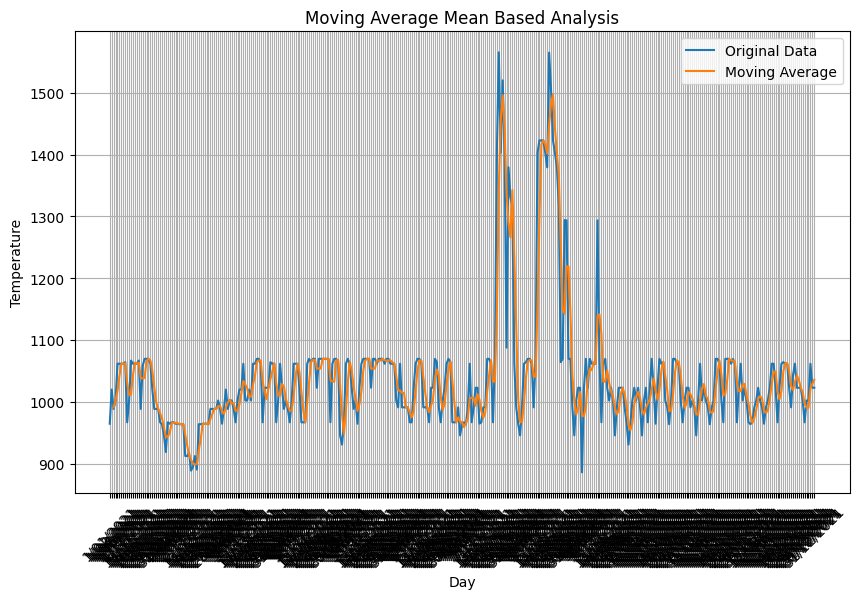

In [ ]:


# Chọn cột dữ liệu để phân tích
column_name = '8'
# Áp dụng moving average
window_size = 3  # Kích thước cửa sổ moving average
df2['moving_average'] = df2[column_name].rolling(window=window_size).mean()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(df2['day'], df2[column_name], label='Original Data')
plt.plot(df2['day'], df2['moving_average'], label='Moving Average')
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.title('Moving Average Mean Based Analysis')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Manba Stock

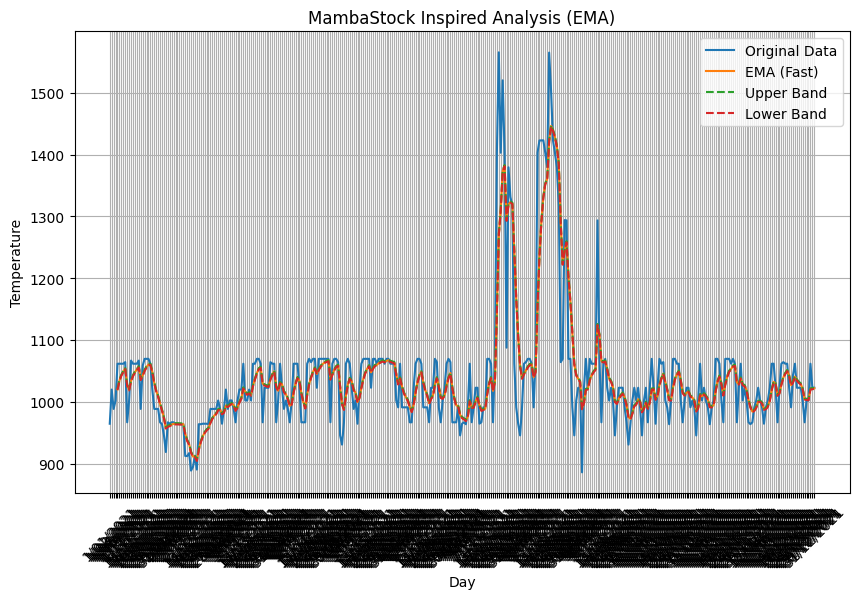

In [ ]:
# Focus on a potentially volatile column (assuming '8' represents a volatile metric)
column_name = '8'

# Shorter window size for faster trend capture (be cautious with very small windows)
window_size = 5  # Experiment with different window sizes

# Calculate moving average with a twist:
# Instead of simple mean, calculate Exponential Moving Average (EMA) for faster reaction
df2['ema'] = df2[column_name].ewm(alpha=0.3, min_periods=window_size).mean()  # EMA with alpha for responsiveness

# Plot with additional lines for potential entry/exit signals (These are placeholders, actual signals might require more complex logic)
plt.figure(figsize=(10, 6))
plt.plot(df2['day'], df2[column_name], label='Original Data')
plt.plot(df2['day'], df2['ema'], label='EMA (Fast)')

# Add placeholder lines for potential entry/exit signals (replace with your strategy)
upper_band = df2['ema'] + 1  # Placeholder for a possible buy signal
lower_band = df2['ema'] - 1  # Placeholder for a possible sell signal
plt.plot(df2['day'], upper_band, label='Upper Band', linestyle='--')
plt.plot(df2['day'], lower_band, label='Lower Band', linestyle='--')

plt.xlabel('Day')
plt.ylabel('Temperature')  # Replace 'Temperature' with the actual metric name
plt.title('MambaStock Inspired Analysis (EMA)')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


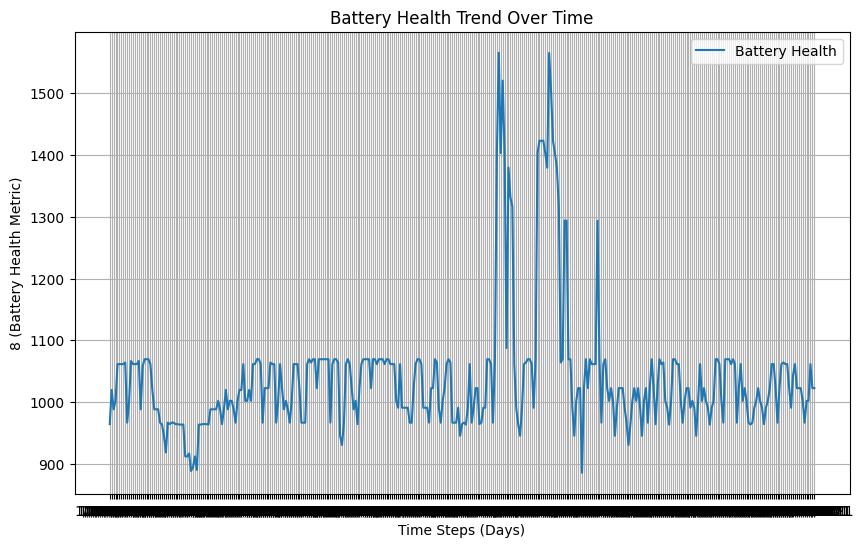

Estimated Degradation Rate: 0.15945205479452068


In [ ]:
# Assuming 'day' represents time steps and '8' represents a battery health metric
column_name = '8'

# Calculate State of Health (SOH) degradation rate (example)
# This is a simplified example, consult MambaLithium research for more advanced methods
degradation_rate = (df2[column_name].iloc[-1] - df2[column_name].iloc[0]) / len(df2)

# Plot the battery health metric over time
plt.figure(figsize=(10, 6))
plt.plot(df2['day'], df2[column_name], label='Battery Health')
plt.xlabel('Time Steps (Days)')  # Modify label if 'day' represents different units
plt.ylabel(f'{column_name} (Battery Health Metric)')  # Replace with actual metric name
plt.title('Battery Health Trend Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Print the degradation rate (example)
print(f"Estimated Degradation Rate: {degradation_rate}")


In [ ]:
# Import libraries (assuming you have TensorFlow installed)
import tensorflow as tf

# Select data column (assuming '8' represents your time series data)
column_name = '8'

# Preprocess data (essential for machine learning models)
# This is a placeholder, adapt it to your specific data
df2_scaled = (df2[column_name] - df2[column_name].mean()) / df2[column_name].std()

df2_scaled = df2_scaled.values.reshape(-1, 1)
# Define a simple MambaMixer-inspired model (placeholder)
# This is a very basic example, consult MambaMixer research for actual architecture
model = tf.keras.Sequential([
  #tf.keras.layers.Dense(16, activation='relu', input_shape=(df2_scaled.shape[1],)), 
  tf.keras.layers.Dense(16, activation='relu', input_shape=(1,)), # First hidden layer with ReLU activation
  tf.keras.layers.Dense(8, activation='relu'),  # Second hidden layer with ReLU activation
  tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model (placeholder, loss function and optimizer might need adjustments)
model.compile(loss='mse', optimizer='adam')

# Train the model (placeholder, adjust epochs and batch size)
model.fit(df2_scaled.values.reshape(-1, 1), df2[column_name].values, epochs=10, batch_size=32)

# Prediction (placeholder, replace with actual prediction logic)
# This predicts the next value in the time series, you might need more data for predictions
predicted_value = model.predict(df2_scaled.iloc[-1:].values.reshape(-1, 1))

# Plot (original data and predicted value)
plt.figure(figsize=(10, 6))
plt.plot(df2['day'], df2[column_name], label='Original Data')
plt.plot(df2['day'].iloc[-1:], predicted_value.flatten(), label='Predicted Value')  # Plot predicted value at the last timestep
plt.xlabel('Day')
plt.ylabel(f'{column_name} (Metric)')  # Replace with actual metric name
plt.title('MambaMixer Inspired Time Series Analysis')
plt.legend()
plt.grid(True)
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
# Định nghĩa hàm markov_chain
def markov_chain(transmat, state, state_names, samples):
    (rows, cols) = transmat.shape 
    rvs = [] 
    values = list(np.arange(0,rows))

    # Tạo các biến ngẫu nhiên cho mỗi hàng của ma trận chuyển tiếp
    for r in range(rows): 
        rv = stats.rv_discrete(name="row" + str(r), values=(values, transmat[r]))
        rvs.append(rv)

    # Bắt đầu từ trạng thái ban đầu và sau đó lấy mẫu biến ngẫu nhiên phù hợp
    # dựa trên trạng thái theo sau các chuyển tiếp
    states = [] 
    for n in range(samples): 
        state = rvs[state].rvs(1)[0]    
        states.append(state_names[state])
    return states

# Tính toán ma trận chuyển tiếp từ dữ liệu thời tiết
def compute_transition_matrix(df):
    weather_states = []
    for column in df.columns[1:]:
        for i in range(len(df[column])-1):
            if df[column][i] < df[column][i+1]:
                weather_states.append('S')  # Nắng
            else:
                weather_states.append('C')  # Mây

    transition_counts = {'S': {'S': 0, 'C': 0}, 'C': {'S': 0, 'C': 0}}
    for i in range(len(weather_states)-1):
        from_state = weather_states[i]
        to_state = weather_states[i+1]
        transition_counts[from_state][to_state] += 1

    transition_matrix = np.zeros((2, 2))
    for i, from_state in enumerate(['S', 'C']):
        for j, to_state in enumerate(['S', 'C']):
            transition_matrix[i, j] = transition_counts[from_state][to_state] / weather_states.count(from_state)

    return transition_matrix

# Đọc dữ liệu thời tiết từ DataFrame
data = {
    "day": ["1/01/2021", "1/02/2021", "1/03/2021", "1/04/2021", "1/05/2021"],
    "8": [964.4, 1019.7, 988.4, 1002.0, 1061.5],
    "9": [964.4, 1019.7, 988.4, 1002.1, 1061.5],
    "10": [964.4, 1019.7, 988.4, 1002.1, 1061.5]
}

df = pd.DataFrame(data)

# Tính toán ma trận chuyển tiếp từ dữ liệu thời tiết
transmat = compute_transition_matrix(df)

# Gọi hàm markov_chain để tạo mẫu dữ liệu thời tiết dựa trên ma trận chuyển tiếp
samples = markov_chain(transmat, 0, ['S', 'C'], 365)

# In ra mẫu dữ liệu thời tiết
print(samples)


ValueError: The sum of provided pk is not 1.

In [ ]:
# Định nghĩa hàm markov_chain
def markov_chain(transmat, state, state_names, samples):
    (rows, cols) = transmat.shape 
    rvs = [] 
    values = list(np.arange(0,rows))

    # Tạo các biến ngẫu nhiên cho mỗi hàng của ma trận chuyển tiếp
    for r in range(rows): 
        rv = stats.rv_discrete(name="row" + str(r), values=(values, transmat[r]))
        rvs.append(rv)

    # Bắt đầu từ trạng thái ban đầu và sau đó lấy mẫu biến ngẫu nhiên phù hợp
    # dựa trên trạng thái theo sau các chuyển tiếp
    states = [] 
    for n in range(samples): 
        state = rvs[state].rvs(1)[0]    
        states.append(state_names[state])
    return states

# Tính toán ma trận chuyển tiếp từ dữ liệu thời tiết
def compute_transition_matrix(df2):
    weather_states = []
    for column in df2.columns[1:]:
        for i in range(len(df[feats][column])-1):
            if df2[column][i] < df2[column][i+1]:
                weather_states.append('S')  # Nắng
            else:
                weather_states.append('C')  # Mây

    transition_counts = {'S': {'S': 0, 'C': 0}, 'C': {'S': 0, 'C': 0}}
    for i in range(len(weather_states)-1):
        from_state = weather_states[i]
        to_state = weather_states[i+1]
        transition_counts[from_state][to_state] += 1

    transition_matrix = np.zeros((2, 2))
    for i, from_state in enumerate(['S', 'C']):
        for j, to_state in enumerate(['S', 'C']):
            transition_matrix[i, j] = transition_counts[from_state][to_state] / weather_states.count(from_state)

    return transition_matrix

# # Đọc dữ liệu thời tiết từ DataFrame
# data = {
#     "day": ["1/01/2021", "1/02/2021", "1/03/2021", "1/04/2021", "1/05/2021"],
#     "8": [964.4, 1019.7, 988.4, 1002.0, 1061.5],
#     "9": [964.4, 1019.7, 988.4, 1002.1, 1061.5],
#     "10": [964.4, 1019.7, 988.4, 1002.1, 1061.5]
# }

# df = pd.DataFrame(data)



In [ ]:
# Chuẩn hóa mỗi hàng của ma trận chuyển tiếp để tổng của mỗi hàng là 1
def normalize_transition_matrix(transition_matrix):
    return transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# Tạo các biến ngẫu nhiên cho mỗi hàng của ma trận chuyển tiếp
def create_random_variables(transmat):
    rvs = []
    rows, _ = transmat.shape
    values = list(np.arange(0, rows))
    for r in range(rows): 
        rv = stats.rv_discrete(name="row" + str(r), values=(values, transmat[r]))
        rvs.append(rv)
    return rvs

# Định nghĩa hàm markov_chain
def markov_chain(transmat, state, state_names, samples):
    transmat = normalize_transition_matrix(transmat)
    rvs = create_random_variables(transmat)

    # Bắt đầu từ trạng thái ban đầu và sau đó lấy mẫu biến ngẫu nhiên phù hợp
    # dựa trên trạng thái theo sau các chuyển tiếp
    states = [] 
    for n in range(samples): 
        state = rvs[state].rvs(1)[0]    
        states.append(state_names[state])
    return states

# Gọi hàm markov_chain để tạo mẫu dữ liệu thời tiết dựa trên ma trận chuyển tiếp
samples = markov_chain(transmat, 0, ['S', 'C'], 365)

# In ra mẫu dữ liệu thời tiết
print(samples)


IndexError: invalid index to scalar variable.

In [ ]:
# Tính toán ma trận chuyển tiếp từ dữ liệu thời tiết
transmat = compute_transition_matrix(df2)

# Gọi hàm markov_chain để tạo mẫu dữ liệu thời tiết dựa trên ma trận chuyển tiếp
samples = markov_chain(transmat, 0, ['S', 'C'], 365)

# In ra mẫu dữ liệu thời tiết
print(samples)

ValueError: The sum of provided pk is not 1.